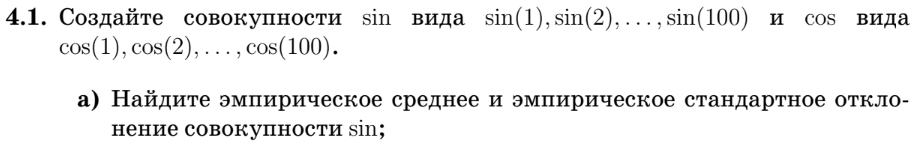

In [1]:
import numpy as np
from sympy import *
from math import *
from IPython.display import display, Math, Latex
from scipy.stats import *
import matplotlib.pyplot as plt

In [2]:
sn = np.array([sin(i) for i in range(1,101)])
cs = np.array([cos(i) for i in range(1,101)])

In [3]:
print(f'эмпирическое среднее синус: {simplify(sn.mean())}')
print(f'эмпирическое среднее косинус: {simplify(cs.mean())}')
print(f'эмпирическое стандартное отклонение синус: {simplify(sn.std())}')
print(f'эмпирическое стандартное отклонение косинус: {simplify(cs.std())}')

эмпирическое среднее синус: -0.00127171013660420
эмпирическое среднее косинус: -0.00532288608230391
эмпирическое стандартное отклонение синус: 0.709000887115772
эмпирическое стандартное отклонение косинус: 0.705186352467297


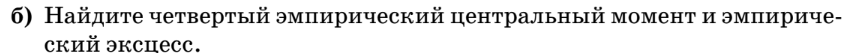

In [4]:
print(moment(sn, 4))
print(moment(cs,4))
print(kurtosis(sn))
print(kurtosis(cs))

0.37697988066557236
0.37157666007610635
-1.5081297338390796
-1.4974365109390264


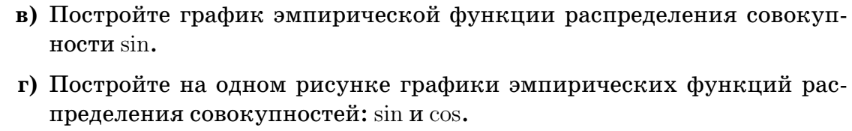

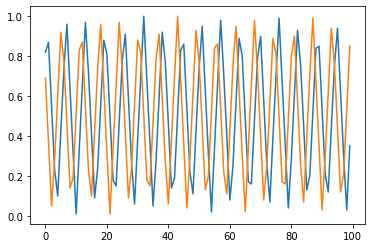

In [5]:
x = [len([i for i in sn if i <= sn[j]])/100 for j in range(100)]
y = [len([i for i in cs if i <= cs[j]])/100 for j in range(100)]
fig, ax = plt.subplots()
ax.plot(range(100), x)
ax.plot(range(100), y)
plt.show()

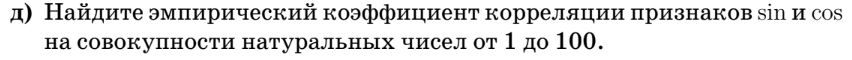

In [6]:
Matrix(np.corrcoef(sn, cs))

Matrix([
[                 1.0, -0.00273378144236358],
[-0.00273378144236358,                  1.0]])

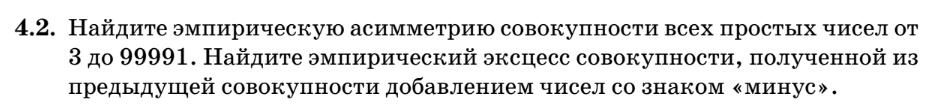

In [7]:
skew([i for i in range(3, 99992) if isprime(i)]) #ассиметрия

0.08788574351776704

In [8]:
kurtosis([i for i in range(-99991, 99992) if isprime(i) and i not in [-1,-2,0,1,2]])

-1.21803605004421

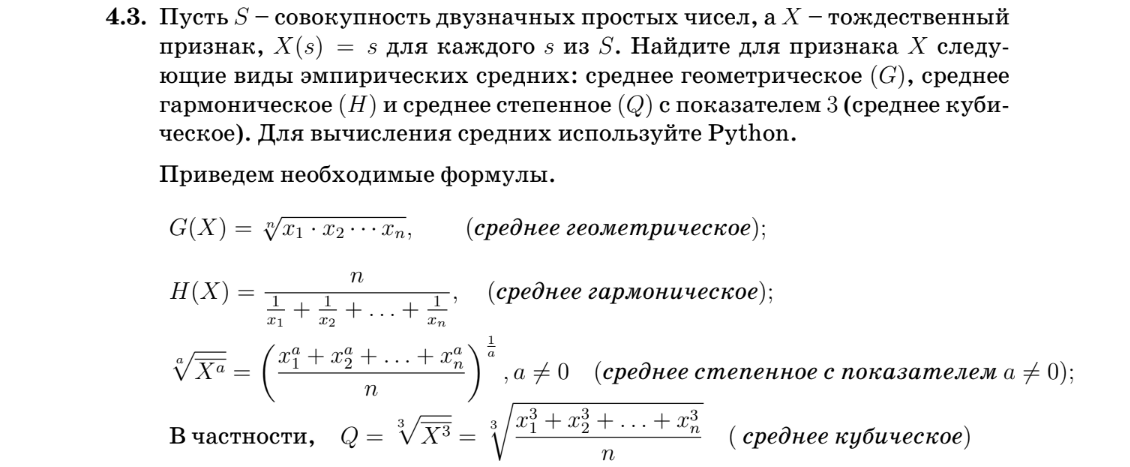

In [35]:
S = [i for i in range(10,100) if isprime(i)]
G = prod(S)**(1/len(S))
H = len(S)/sum(1/x for x in S)
Q = (sum(x**3 for x in S)/len(S))**(1/3)
G, H, Q

(41.781014648871, 33.51277429915806, 60.697103107111786)

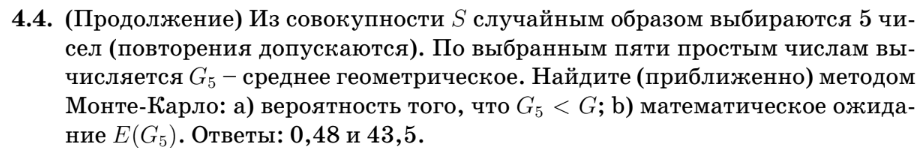

In [11]:
s = np.random.choice(S, size=5)
s

array([79, 97, 97, 17, 73])

In [12]:
G5 = prod(s)**(1/5)
G5

62.08525486359997

In [14]:
# вероятность G5 < G
k = 0
G = prod(S)**(1/len(S))
for i in range(10000):
    s = np.random.choice(S, size=5)
    G5 = prod(s)**(1/5)
    if G5 < G:
        k += 1
print(k/10000)

C:\Users\cosit\AppData\Local\Temp\ipykernel_3304\2763934847.py:5: RuntimeWarning: overflow encountered in long_scalars
  G5 = prod(s)**(1/5)
C:\Users\cosit\AppData\Local\Temp\ipykernel_3304\2763934847.py:5: RuntimeWarning: invalid value encountered in power
  G5 = prod(s)**(1/5)


0.4809


In [37]:
# мат. ожидание G5
mean = 0
for i in range(10000):
    s = np.random.choice(S, size=5)
    G5 = prod(s)**(1/5)
    mean += G5
print(G5/10000)

C:\Users\cosit\AppData\Local\Temp\ipykernel_3304\2748013419.py:5: RuntimeWarning: overflow encountered in long_scalars
  G5 = prod(s)**(1/5)
C:\Users\cosit\AppData\Local\Temp\ipykernel_3304\2748013419.py:5: RuntimeWarning: invalid value encountered in power
  G5 = prod(s)**(1/5)


0.003986177604925675


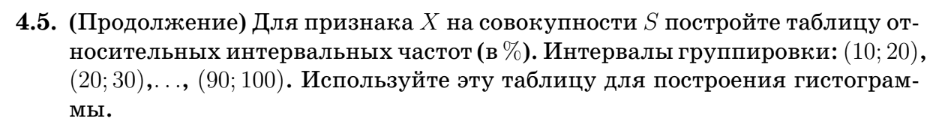

In [65]:
d = {}
for a in [10,20,30,40,50,60,70,80,90]:
    d[str(a)+'-'+str(a+10)] = []
a = 10
for x in S:
    if a <= x <= a+10:
        d[str(a)+'-'+str(a+10)].append(x)
    else:
        d[str(a+10)+'-'+str(a+20)].append(x)
        a += 10
d

{'10-20': [11, 13, 17, 19],
 '20-30': [23, 29],
 '30-40': [31, 37],
 '40-50': [41, 43, 47],
 '50-60': [53, 59],
 '60-70': [61, 67],
 '70-80': [71, 73, 79],
 '80-90': [83, 89],
 '90-100': [97]}

In [66]:
for k,v in d.items():
    d[k] = len(v)/len(S)
d

{'10-20': 0.19047619047619047,
 '20-30': 0.09523809523809523,
 '30-40': 0.09523809523809523,
 '40-50': 0.14285714285714285,
 '50-60': 0.09523809523809523,
 '60-70': 0.09523809523809523,
 '70-80': 0.14285714285714285,
 '80-90': 0.09523809523809523,
 '90-100': 0.047619047619047616}

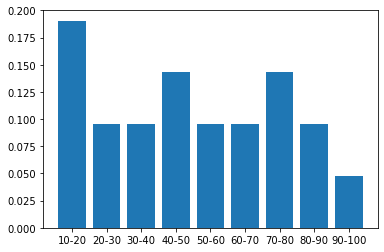

In [67]:
fig, ax = plt.subplots()
ax.bar(d.keys(), d.values())
plt.show()